# disordered Anderson system of system size 20*20*20 
# author : Wassim Swaileh
# ETIS Lab UMR 8051, CY Cergy Paris University, ENSEA, CNRS
# Version number : 0.0
# Date : 28/11/2020

### 1. import libraries

In [1]:
import os
import glob
import bz2
from bz2 import BZ2File as bzopen
import codecs
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import *
import numpy as np
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataname = 'data-L20-8000-RAW-DATA-W15.0-W18.0'
data_path='./data'
modelname = '/model_'+dataname+'.h5'
modelpath = './model'+modelname
historyname = '/history_'+dataname+'.pkl'
historypath = './model'+historyname

### 2. generate dumy data

In [3]:
data_path='./data'
example=[]
label=[]
all_subdirs = [d for d in os.listdir('./data')]
#print(all_subdirs)
for c_indx, clss in enumerate(all_subdirs):
    print(c_indx, clss)
    all_files = glob.glob('./data/'+clss+'/*/*/*.raw.bz2')
    for e in all_files:
        # reading a bz2 archive
        with bzopen(all_files[0], "r") as bzfin:
            """ Handle lines here """
            lines = []
            for i, line in enumerate(bzfin):
                lines.append(float(line.rstrip()))
        example.append(lines)
        if c_indx == 0:
            label.append([1., 0.])
        elif c_indx == 1:
            label.append([0., 1.])

#lines

0 W15.0
1 W18.0


In [4]:
X_sparse = coo_matrix(example)
X = np.asarray(example, dtype=np.float32)
y = np.asarray(label, dtype=np.float32)
# data shuffeling
X, X_sparse, y = shuffle(X, X_sparse, y, random_state=0)
# train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Dense layer Model architecture

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [6]:
model.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 516,354
Trainable params: 516,354
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(X_train, y_train,
             epochs=20,
             batch_size=128)

Epoch 1/20
58/58 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.9524
Epoch 2/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9977
Epoch 3/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9989
Epoch 4/20
58/58 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9992
Epoch 5/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9988
Epoch 6/20
58/58 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9997
Epoch 7/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9993
Epoch 8/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9997
Epoch 9/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9996
Epoch 10/20
58/58 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9996
Epoch 11/20
58/58 [

In [8]:
model.save(modelpath) 

## testing the quality of the learned model
### training history

25/25 [==============================] - 0s 2ms/step - loss: 2.4661e-06 - accuracy: 1.0000

Test loss: 2.4660546387167415e-06
Test accuracy: 1.0


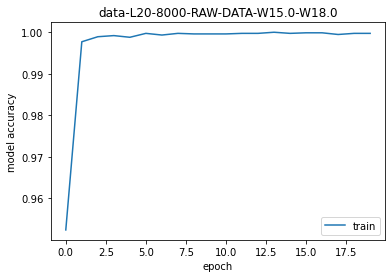

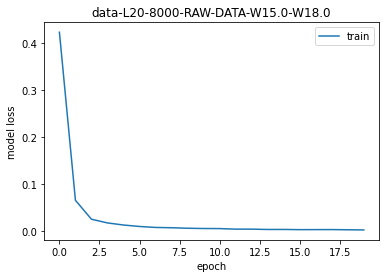

In [9]:
# evaluate model
#score=model.evaluate(validation_set,verbose=1)
score = model.evaluate(X_test, y_test, batch_size=128,)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig=plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title(dataname)
plt.show()
#fig.savefig(datapath+'/'+dataname+'_accuracy'+'.png')

# summarize history for loss
fig=plt.figure()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title(dataname)
plt.show()
#fig.savefig(datapath+'/'+dataname+'_loss'+'.png')

In [10]:
model.predict(X_test[50:51], batch_size=None, verbose=0, steps=None)

array([[9.9999690e-01, 3.1522443e-06]], dtype=float32)

In [11]:
y_test[50]

array([1., 0.], dtype=float32)